# kaggle project - cats vs dogs

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:54<00:00, 21.4MB/s]
100% 1.06G/1.06G [00:55<00:00, 20.8MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip.extractall('/content')
zip.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [11]:
# Generate image
train_ds = keras.utils.image_dataset_from_directory(directory='/content/train',
                                                    labels='inferred', label_mode='int',
                                                    batch_size=32, image_size=(256,256))

test_ds = keras.utils.image_dataset_from_directory(directory='/content/test',
                                                    labels='inferred', label_mode='int',
                                                    batch_size=32, image_size=(256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Normalise the dataset

def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

In [14]:
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
# train_ds = train_ds/255.0

# Build CNN Model - LeNet5

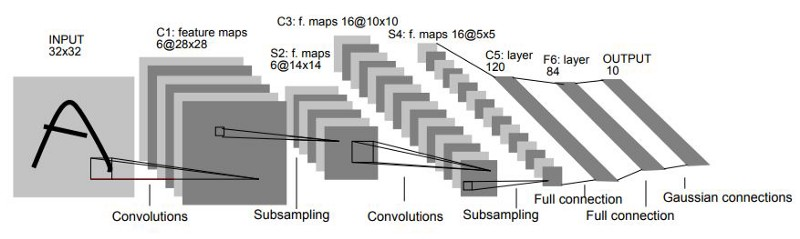

In [8]:
from keras.layers.pooling.average_pooling2d import AveragePooling2D
model = Sequential()
# C1 convolutional Layer
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh', input_shape=(256,256,3)))
# Avg Pooling
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# C2  Convolutional Layer
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'))
# Avg Pooling
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Flatten the model
model.add(Flatten())

# DNN1
model.add(Dense(120, activation='tanh'))

# DNN2
model.add(Dense(84, activation='tanh'))
# output
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 126, 126, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 61, 61, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 59536)             0         
                                                                 
 dense (Dense)               (None, 120)               7

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, batch_size=32, epochs=20, validation_data=test_ds)

Epoch 1/20
625/625 [==============================] - 63s 82ms/step - loss: 0.7138 - accuracy: 0.5018 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 2/20
625/625 [==============================] - 46s 73ms/step - loss: 0.6944 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
625/625 [==============================] - 45s 72ms/step - loss: 0.6951 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
625/625 [==============================] - 48s 76ms/step - loss: 0.6947 - accuracy: 0.4962 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/20
391/625 [=================>............] - ETA: 14s - loss: 0.6948 - accuracy: 0.5024

KeyboardInterrupt: ignored

# AlexNet Architecture

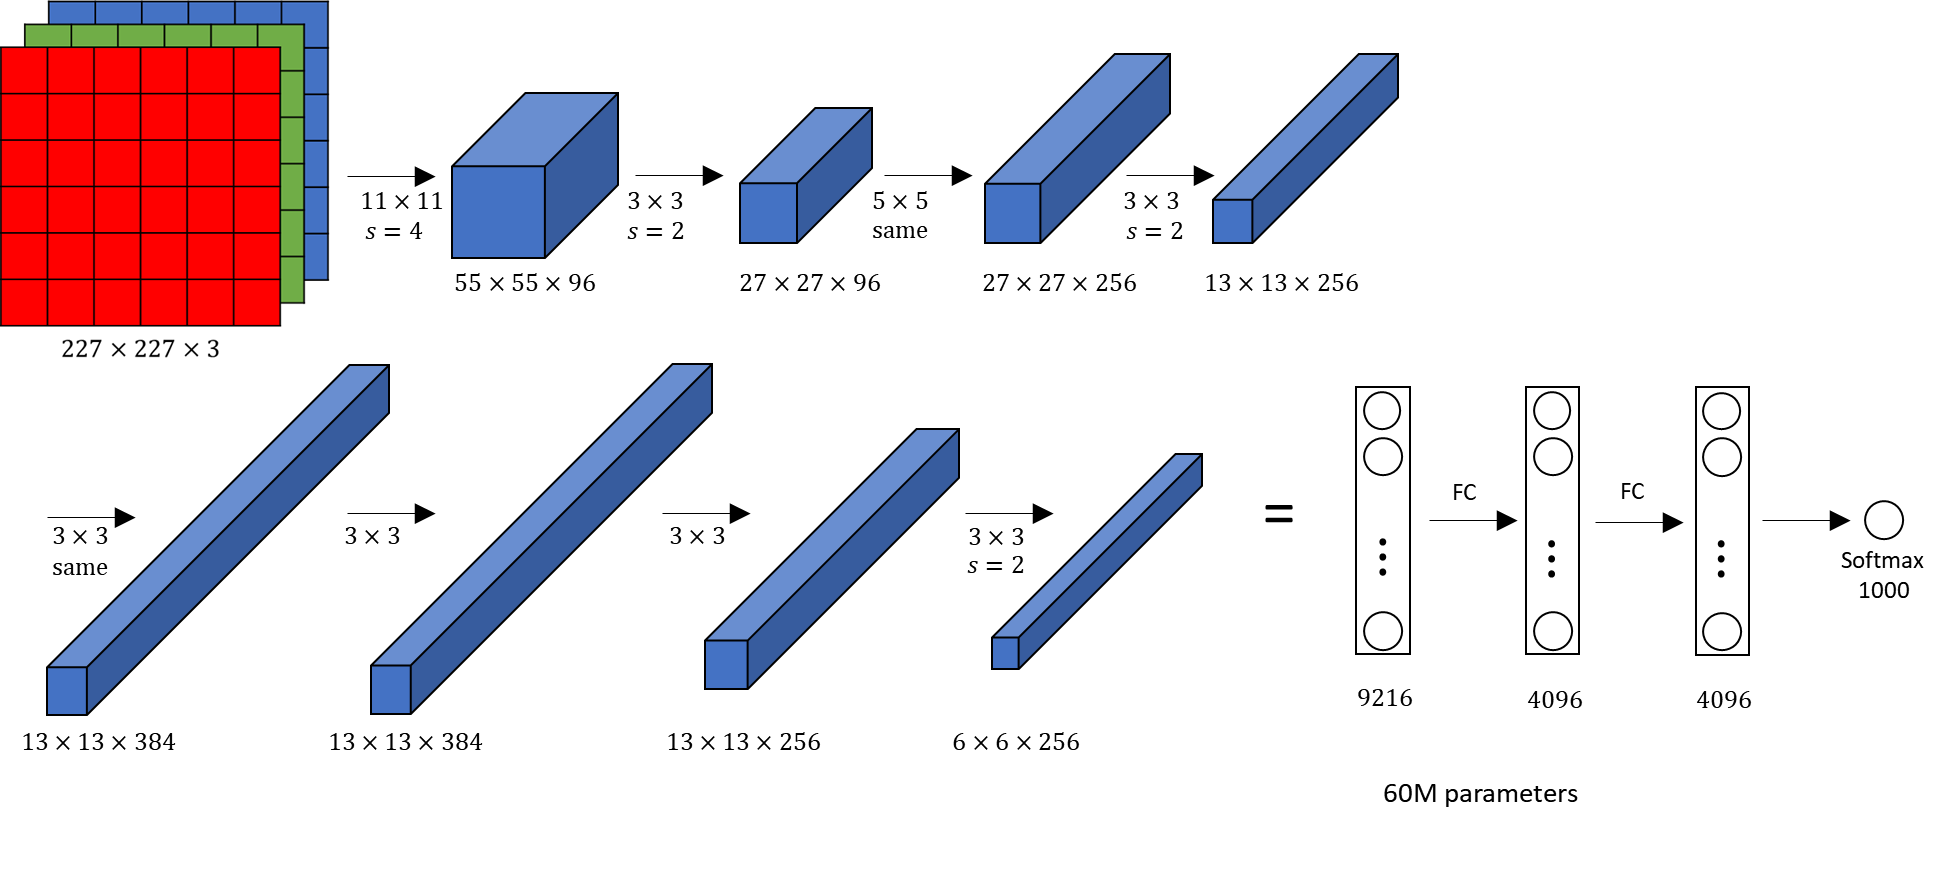

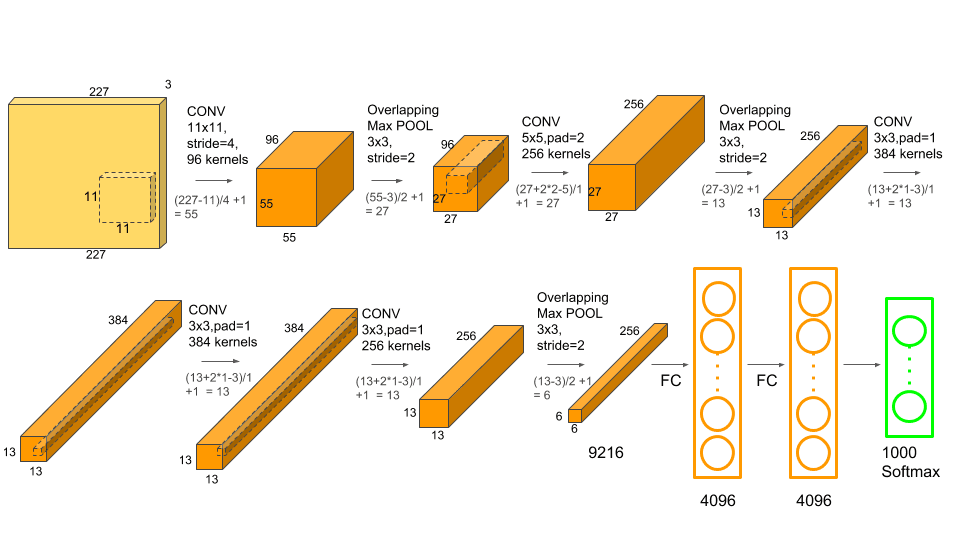

In [15]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(11,11), strides=4, activation='relu', input_shape=(256,256,3), padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(Conv2D(256, kernel_size=(5,5), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(Conv2D(384, kernel_size=(3,3), padding='same', strides=1, activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(384, kernel_size=(3,3),  strides=1, activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3,3), strides=1, activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4096, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, batch_size=32, epochs=20, validation_data=test_ds)

Epoch 1/20
625/625 [==============================] - 58s 81ms/step - loss: 0.8532 - accuracy: 0.5913 - val_loss: 2.1388 - val_accuracy: 0.5000
Epoch 2/20
625/625 [==============================] - 53s 83ms/step - loss: 0.6233 - accuracy: 0.6836 - val_loss: 0.5589 - val_accuracy: 0.7182
Epoch 3/20
625/625 [==============================] - 53s 84ms/step - loss: 0.5120 - accuracy: 0.7598 - val_loss: 0.9541 - val_accuracy: 0.5668
Epoch 4/20
625/625 [==============================] - 51s 82ms/step - loss: 0.4007 - accuracy: 0.8199 - val_loss: 0.5338 - val_accuracy: 0.7292
Epoch 5/20
625/625 [==============================] - 53s 84ms/step - loss: 0.3307 - accuracy: 0.8568 - val_loss: 0.4979 - val_accuracy: 0.7882
Epoch 6/20
625/625 [==============================] - 54s 85ms/step - loss: 0.2921 - accuracy: 0.8792 - val_loss: 0.3904 - val_accuracy: 0.8156
Epoch 7/20
625/625 [==============================] - 53s 84ms/step - loss: 0.2631 - accuracy: 0.8873 - val_loss: 0.4577 - val_accuracy: